# Uplift Models using EconML

Project Goal: Predict the people most likely to click on a display ad given

## Import Libraries & Data

In [19]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For saving models
import joblib

# EconML Libraries
from econml.metalearners import SLearner, TLearner, XLearner

# Dataset
from sklift.datasets import fetch_criteo

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Display settings
%matplotlib inline
sns.set(style="whitegrid")

# random state
rs = 481516234

In [2]:
# Load Dataset
# dataset = fetch_criteo(target_col='conversion', treatment_col='exposure')
# data, target, treatment = dataset.data, dataset.target, dataset.treatment

# alternative option
data, target, treatment = fetch_criteo(target_col='conversion', treatment_col='exposure', return_X_y_t=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f0      float64
 1   f1      float64
 2   f2      float64
 3   f3      float64
 4   f4      float64
 5   f5      float64
 6   f6      float64
 7   f7      float64
 8   f8      float64
 9   f9      float64
 10  f10     float64
 11  f11     float64
dtypes: float64(12)
memory usage: 1.2 GB


## Clean Data

In [ ]:
# Split into training and test sets
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(data,target,treatment, test_size=0.3, random_state=rs)

## Exploratory Data Analysis (EDA)

## Train Models

### S-Learner

https://econml.azurewebsites.net/_autosummary/econml.metalearners.SLearner.html
- The S-Learner in EconML 

In [9]:
%%time
# S-learner
s_learner = SLearner(overall_model=RandomForestRegressor(random_state=rs))
s_learner.fit(Y_train, T_train, X=X_train)

# Predict treatment effects
s_te = s_learner.effect(X_test)

CPU times: total: 1h 58min 40s
Wall time: 2h 22s


In [18]:
df_s_te = pd.DataFrame(s_te, columns=['s_te'])
df_s_te.to_csv('s_te.csv', index=False)

In [16]:
# Save the SLearner model to a file
joblib.dump(s_learner, 's_learner_model.pkl')

['s_learner_model.pkl']

In [ ]:
# # Load the SLearner model from the file
# loaded_s_learner = joblib.load('s_learner_model.pkl')

# # You can now use the loaded model
# predicted_effects = loaded_s_learner.effect(X_test)

### T-Learner

### X-Learner

## Evaluate Models

In [21]:
# Example: Mean Squared Error
s_rmse = root_mean_squared_error(Y_test, s_te)
# t_rmse = root_mean_squared_error(Y_test, t_te, squared=False)
# x_rmse = root_mean_squared_error(Y_test, x_te, squared=False)

print(f"S-learner RMSE: {s_rmse}")
# print(f"T-learner RMSE: {t_rmse}")
# print(f"X-learner RMSE: {x_rmse}")

S-learner RMSE: 0.5717077614440718


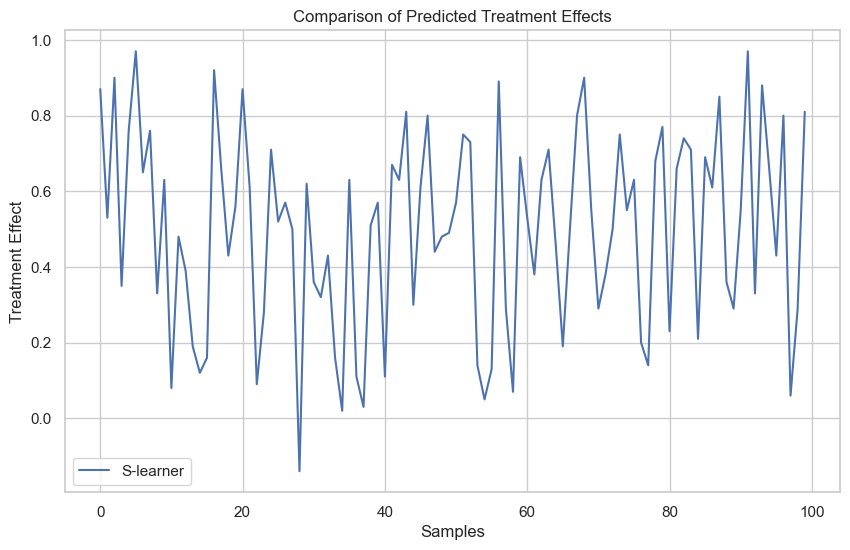

In [22]:
# Example visualization
plt.figure(figsize=(10, 6))
plt.plot(s_te[:100], label='S-learner')
# plt.plot(t_te[:100], label='T-learner')
# plt.plot(x_te[:100], label='X-learner')
plt.legend()
plt.title("Comparison of Predicted Treatment Effects")
plt.xlabel("Samples")
plt.ylabel("Treatment Effect")
plt.show()

***